# ClimaX notebook

In [52]:
from torchdata import _torchdata as _torchdata
import holoviews as hv
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))


In [49]:
!cd /g/data/wb00/admin/staging/weatherbench/ && tree -L 1 ./5.625deg/ 

./5.625deg/
├── 10m_u_component_of_wind
├── 10m_v_component_of_wind
├── 2m_temperature
├── constants.nc
├── geopotential
├── relative_humidity
├── specific_humidity
├── temperature
├── toa_incident_solar_radiation
├── total_precipitation
├── u_component_of_wind
└── v_component_of_wind

11 directories, 1 file


In [51]:
import os
import torch
os.chdir('/g/data/wb00/admin/staging/climax_train_global/test/') 
with open('/g/data/wb00/admin/staging/climax_train_global/test/x-4.pt','rb') as f:
    x = torch.load(f)
with open('/g/data/wb00/admin/staging/climax_train_global/test/y-4.pt','rb') as f:
    y = torch.load(f)   
with open('/g/data/wb00/admin/staging/climax_train_global/test/preds-4.pt','rb') as f:
    preds = torch.load(f)    
print(x.shape,y.shape,preds.shape)    

torch.Size([16, 48, 32, 64]) torch.Size([16, 3, 32, 64]) torch.Size([16, 3, 32, 64])


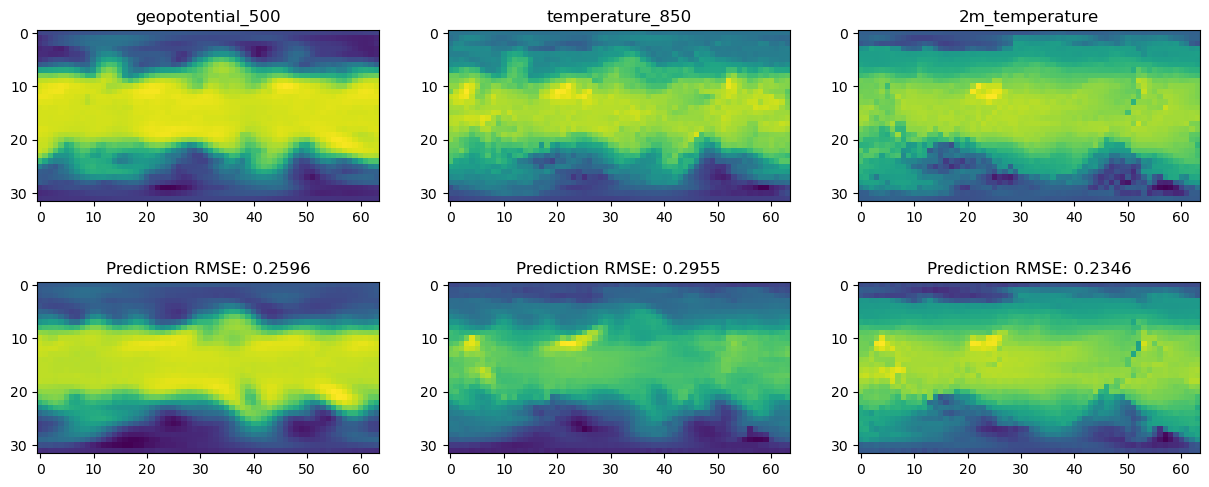

In [87]:
from matplotlib import pyplot as plt
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
 
ax1.imshow(y[1][0])
ax2.imshow(y[1][1])
ax3.imshow(y[1][2])
ax4.imshow(preds[1][0])
ax5.imshow(preds[1][1])
ax6.imshow(preds[1][2])
ax1.title.set_text('geopotential_500')
ax2.title.set_text('temperature_850')
ax3.title.set_text('2m_temperature')
ax4.title.set_text("Prediction RMSE: " + str(round (RMSELoss(preds[1][0] ,y[1][0]).item(),4) ) )
ax5.title.set_text("Prediction RMSE: " + str(round (RMSELoss(preds[1][1] ,y[1][1]).item(),4) )  )
ax6.title.set_text("Prediction RMSE: " + str(round (RMSELoss(preds[1][2] ,y[1][2]).item(),4) )  )
plt.show()

In [20]:
RMSELoss(preds[1][2] ,y[1][2])

tensor(0.2346)

In [22]:
import numpy as np
import xarray

In [27]:
f='/g/data/wb00/admin/staging/weatherbench/5.625deg_npz/pred/2018_0.npz'
x = np.load(f, mmap_mode='r')
i=0
for k in x.files:
     print (i, end= " ")
     print(k)
     i+=1

0 land_sea_mask
1 orography
2 lattitude
3 2m_temperature
4 10m_u_component_of_wind
5 10m_v_component_of_wind
6 toa_incident_solar_radiation
7 total_precipitation
8 geopotential_50
9 geopotential_250
10 geopotential_500
11 geopotential_600
12 geopotential_700
13 geopotential_850
14 geopotential_925
15 geopotential_1000
16 u_component_of_wind_50
17 u_component_of_wind_250
18 u_component_of_wind_500
19 u_component_of_wind_600
20 u_component_of_wind_700
21 u_component_of_wind_850
22 u_component_of_wind_925
23 u_component_of_wind_1000
24 v_component_of_wind_50
25 v_component_of_wind_250
26 v_component_of_wind_500
27 v_component_of_wind_600
28 v_component_of_wind_700
29 v_component_of_wind_850
30 v_component_of_wind_925
31 v_component_of_wind_1000
32 temperature_50
33 temperature_250
34 temperature_500
35 temperature_600
36 temperature_700
37 temperature_850
38 temperature_925
39 temperature_1000
40 relative_humidity_50
41 relative_humidity_250
42 relative_humidity_500
43 relative_humidity_6